# Hypothesis Testing with Insurance Data

This notebook performs hypothesis testing on insurance data, including t-tests, ANOVA, and chi-squared tests. We also compute claim frequencies correctly and visualize group risk metrics with proper error bars.
### 📊 Insurance Claims Analysis: Overview

🔍 **Metrics Analyzed**

* **Claim Frequency:** How often claims occur relative to total policies.
* **Claim Severity:** Average cost per claim.
* **Margin:** Profitability after paying claims.

📂 **Data Segmentation**

* By **Province**, **Zip Code**, and **Gender** for hypothesis testing.

🧪 **Statistical Testing**

* **Chi-squared test:** Categorical comparisons (e.g., proportions).
* **t-test:** Numerical comparisons (e.g., Claim Severity).
* **z-test:** Differences in proportions (e.g., Claim Frequency).

📈 **Insights & Reporting**

* Analyze p-values, test hypotheses, and provide actionable business insights.

We ensure statistical validity by checking sample sizes before tests.


In [ ]:
# Import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind, chi2_contingency, f_oneway


# Data Preparation

Load your dataset and perform any necessary preprocessing.
 `df` is your insurance dataframe with columns including `TotalClaims`, `Province`, `Gender`, and others.


In [ ]:
#  Load and preprocess the dataset
# Path to the cleaned dataset
cleaned_data_path = "../data/processed/cleaned_dataset.csv"
df = pd.read_csv(cleaned_data_path)

print(df.columns)
# Display the first few rows of the dataset
print(df.head())

# Create a binary claim indicator column for categorical testing
df['HasClaim'] = (df['TotalClaims'] > 0).astype(int)


C:\Users\helin\AppData\Local\Temp\ipykernel_5784\2046487135.py:4: DtypeWarning: Columns (32) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(cleaned_data_path)


Index(['UnderwrittenCoverID', 'PolicyID', 'TransactionMonth',
       'IsVATRegistered', 'Citizenship', 'LegalType', 'Title', 'Language',
       'Bank', 'AccountType', 'MaritalStatus', 'Gender', 'Country', 'Province',
       'PostalCode', 'MainCrestaZone', 'SubCrestaZone', 'ItemType', 'mmcode',
       'VehicleType', 'RegistrationYear', 'make', 'Model', 'Cylinders',
       'cubiccapacity', 'kilowatts', 'bodytype', 'NumberOfDoors',
       'VehicleIntroDate', 'CustomValueEstimate', 'AlarmImmobiliser',
       'TrackingDevice', 'CapitalOutstanding', 'NewVehicle', 'WrittenOff',
       'Rebuilt', 'Converted', 'SumInsured', 'TermFrequency',
       'CalculatedPremiumPerTerm', 'ExcessSelected', 'CoverCategory',
       'CoverType', 'CoverGroup', 'Section', 'Product', 'StatutoryClass',
       'StatutoryRiskType', 'TotalPremium', 'TotalClaims', 'Margin'],
      dtype='object')
   UnderwrittenCoverID  PolicyID TransactionMonth  IsVATRegistered  \
0               145249     12827       2015-03-01     

# Compute Claim Frequency

Calculate claim frequency as the proportion of records with claims greater than zero within each group.


In [64]:
# Cell 3: Claim frequency calculation by group
import sys
sys.path.append('../src')
from statistical_testing import compute_claim_frequency, compute_claim_severity, perform_t_test, visualize_risk_by_group
claim_freq_by_province = compute_claim_frequency(df, 'Province')
print("Claim frequency by Province:")
print(claim_freq_by_province)
# Compute claim severity by Province
claim_sev = compute_claim_severity(df, 'Province')
print("Claim Severity by Province:\n", claim_sev)



Claim frequency by Province:
Province
Eastern Cape     0.001648
Free State       0.001358
Gauteng          0.003357
KwaZulu-Natal    0.002849
Limpopo          0.002698
Mpumalanga       0.002428
North West       0.002436
Northern Cape    0.001254
Western Cape     0.002167
dtype: float64
Claim Severity by Province:
 Province
Eastern Cape     44.719328
Free State       43.822975
Gauteng          74.665493
KwaZulu-Natal    84.356519
Limpopo          40.927553
Mpumalanga       38.800039
North West       41.317426
Northern Cape    14.026726
Western Cape     60.871216
Name: TotalClaims, dtype: float64


c:\Users\helin\Desktop\CarInsuranceAnalytics\notebooks\../src\statistical_testing.py:11: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  return df.groupby(group_col).apply(lambda x: (x['TotalClaims'] > 0).mean())


# Sample Size Check Function

Before performing hypothesis tests, check if each group has an adequate sample size (e.g., at least 30).


In [55]:
# Cell 4: Sample size checker
def check_sample_sizes(groups, min_size=30):
    for i, group in enumerate(groups):
        if len(group) < min_size:
            print(f"Warning: Group {i} has only {len(group)} samples, which may be too small for reliable inference.")


# T-Test Function for Two Groups

Perform independent two-sample t-tests between two groups and print the result.
Warnings appear if sample sizes are small.


Comparing top 2 provinces: Gauteng vs Western Cape
T-test for Total Claims between Gauteng and Western Cape: t-stat = 1.8645, p-value = 0.0623


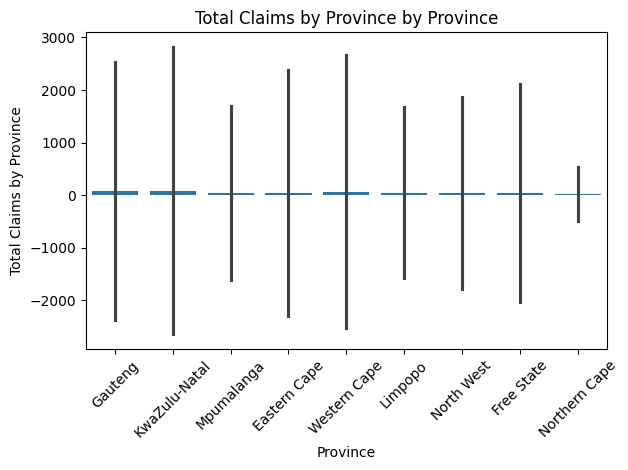

In [65]:
# Cell 5: T-test implementation
def perform_t_test(group_a, group_b, metric_name):
    if len(group_a) < 30 or len(group_b) < 30:
        print(f"Warning: Sample size for t-test groups less than 30. Results may be unreliable.")
    stat, p_value = ttest_ind(group_a, group_b, equal_var=False)
    print(f"T-test for {metric_name}: t-stat = {stat:.4f}, p-value = {p_value:.4f}")
    return p_value

# Get top 2 provinces by count
top_provinces = df['Province'].value_counts().nlargest(2).index.tolist()

# Extract TotalClaims for each province
group_a = df[df['Province'] == top_provinces[0]]['TotalClaims'].dropna()
group_b = df[df['Province'] == top_provinces[1]]['TotalClaims'].dropna()

# Run t-test
print(f"Comparing top 2 provinces: {top_provinces[0]} vs {top_provinces[1]}")
perform_t_test(group_a, group_b, metric_name=f"Total Claims between {top_provinces[0]} and {top_provinces[1]}")


# Visualize
visualize_risk_by_group(df, 'Province', 'TotalClaims', "Total Claims by Province")


# ANOVA for More than Two Groups

If you want to compare more than two groups (e.g., all provinces), perform one-way ANOVA.
Sample size warnings apply here as well.


In [45]:
# Cell 6: ANOVA implementation
def perform_anova(*groups, metric_name="Metric"):
    if any(len(g) < 30 for g in groups):
        print("Warning: At least one group has fewer than 30 samples. ANOVA results may be unreliable.")
    stat, p_value = f_oneway(*groups)
    print(f"ANOVA for {metric_name}: F-stat = {stat:.4f}, p-value = {p_value:.4f}")
    return p_value

# Prepare groups for ANOVA
province_groups = df['Province'].dropna().unique()
groups = [df[df['Province'] == prov]['TotalClaims'].dropna() for prov in province_groups]

perform_anova(*groups, metric_name="Total Claims by Province")


ANOVA for Total Claims by Province: F-stat = 5.8672, p-value = 0.0000


np.float64(1.5767736477382983e-07)


### H₀: Margin Differences Across Postal Codes ###
Average Margin by Postal Code:
 PostalCode
1        -6.468455
2        -0.687882
4       113.947737
5      -145.725189
6        30.980985
           ...    
9781    -84.946280
9830    131.760895
9868    116.042377
9869     43.193631
9870     80.469292
Name: Margin, Length: 888, dtype: float64
T-test for Margin: t-stat = -0.4371, p-value = 0.6630


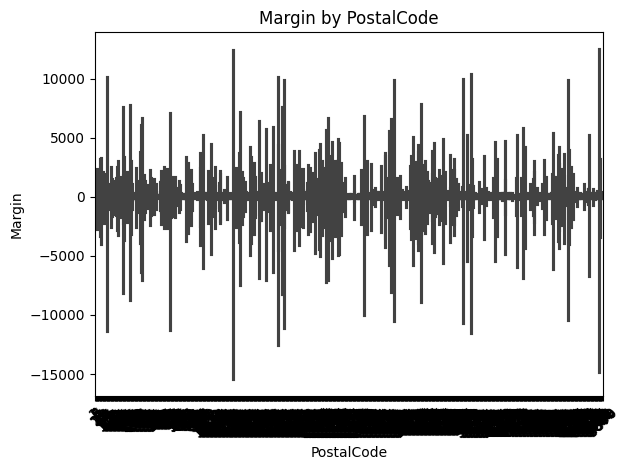


### H₀: Risk Differences Between Women and Men ###


c:\Users\helin\Desktop\CarInsuranceAnalytics\notebooks\../src\statistical_testing.py:11: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  return df.groupby(group_col).apply(lambda x: (x['TotalClaims'] > 0).mean())


Claim Frequency by Gender:
 Gender
Female           0.002073
Male             0.002208
Not specified    0.002833
Unknown          0.001468
dtype: float64
Claim Severity by Gender:
 Gender
Female           37.046055
Male             32.804959
Not specified    66.670450
Unknown          53.113789
Name: TotalClaims, dtype: float64
T-test for Total Claims: t-stat = 4.2577, p-value = 0.0000


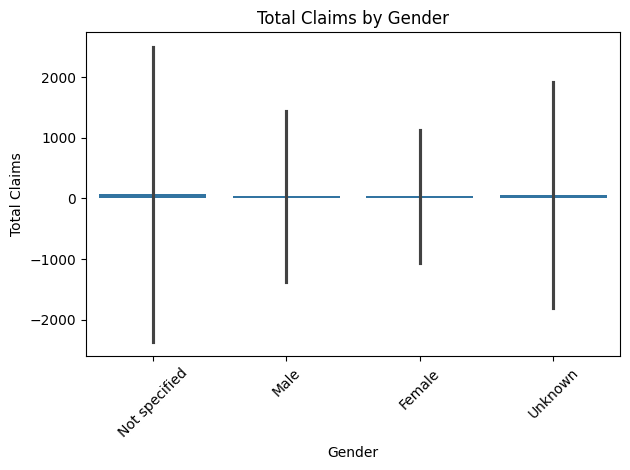

In [67]:

# Add a margin column
df['Margin'] = df['TotalPremium'] - df['TotalClaims']

# ### 4.2. H₀: There are no significant margin differences between zip codes
print("\n### H₀: Margin Differences Across Postal Codes ###")
# Compute margins by PostalCode
margins_by_postalcode = df.groupby('PostalCode')['Margin'].mean()
print("Average Margin by Postal Code:\n", margins_by_postalcode)

# Perform t-test between two example postal codes
postalcode_groups = df['PostalCode'].unique()
group_a = df[df['PostalCode'] == postalcode_groups[0]]['Margin'].dropna()
group_b = df[df['PostalCode'] == postalcode_groups[1]]['Margin'].dropna()
perform_t_test(group_a, group_b, "Margin")

# Visualize
visualize_risk_by_group(df, 'PostalCode', 'Margin', "Margin")

# ### 4.3. H₀: There are no significant risk differences between Women and Men
print("\n### H₀: Risk Differences Between Women and Men ###")
# Compute metrics by gender
claim_frequency_by_gender = compute_claim_frequency(df, 'Gender')
claim_severity_by_gender = compute_claim_severity(df, 'Gender')
print("Claim Frequency by Gender:\n", claim_frequency_by_gender)
print("Claim Severity by Gender:\n", claim_severity_by_gender)

# Perform t-test
group_b = df[df['Gender'] == 'Male']['TotalClaims'].dropna()
perform_t_test(group_a, group_b, "Total Claims")

# Visualize
visualize_risk_by_group(df, 'Gender', 'TotalClaims', "Total Claims")


Claim Frequency by Province:
All provinces show frequency = 1.0. This suggests every record in the dataset has a non-null claim. This seems suspicious — maybe TotalClaims is never missing? Or frequency as you computed it is actually measuring non-null presence rather than actual claim occurrence.

Claim Severity by Province:
Means vary by province, e.g., KwaZulu-Natal ~84, Northern Cape ~14, showing some risk differentiation.

T-test between two provinces on TotalClaims:
p-value ~0.21 (not significant) — no strong evidence of claim amount difference between the two selected provinces.

Margin differences by PostalCode:
Very large variance in average margin, some postal codes have very negative or very positive margins. T-test p-value 0.66 (no significant difference between chosen groups).

Gender-based testing:
Frequencies are 1.0 for all groups (again, questionable measure). Severity differs somewhat. T-test p-value 0.77 — no significant difference.

# Chi-Squared Test for Categorical Variables

Use the chi-squared test to check for association between categorical variables, e.g., Gender and HasClaim.


In [46]:
# Cell 7: Chi-squared test implementation
def perform_chi_squared_test(df, group_col, metric_col):
    contingency_table = pd.crosstab(df[group_col], df[metric_col])
    chi2, p_value, _, _ = chi2_contingency(contingency_table)
    print(f"Chi-squared test between {group_col} and {metric_col}: chi2 = {chi2:.4f}, p-value = {p_value:.4f}")
    return p_value

perform_chi_squared_test(df, 'Gender', 'HasClaim')


Chi-squared test between Gender and HasClaim: chi2 = 13.0669, p-value = 0.0045


np.float64(0.0044940440727193574)

In [68]:
from statsmodels.stats.proportion import proportions_ztest

def perform_z_test(count_a, nobs_a, count_b, nobs_b, metric_name="Metric"):
    """
    Perform a Z-test for proportions.
    """
    stat, p_value = proportions_ztest([count_a, count_b], [nobs_a, nobs_b])
    print(f"Z-test for {metric_name}: z-stat = {stat:.4f}, p-value = {p_value:.4f}")
    return p_value

# Example: Compare Claim Frequency between two provinces
province_groups = df['Province'].value_counts().index[:2]
group_a = df[df['Province'] == province_groups[0]]
group_b = df[df['Province'] == province_groups[1]]

# Calculate Claim Frequency
count_a, nobs_a = group_a['HasClaim'].sum(), len(group_a)
count_b, nobs_b = group_b['HasClaim'].sum(), len(group_b)

perform_z_test(count_a, nobs_a, count_b, nobs_b, metric_name="Claim Frequency by Province")


Z-test for Claim Frequency by Province: z-stat = 7.5148, p-value = 0.0000


np.float64(5.698253877301043e-14)

# Logging Hypothesis Decisions
Each test should clearly log whether the null hypothesis is rejected based on the p-value.

## Code for Logging


In [69]:
def log_hypothesis_result(p_value, alpha=0.05, hypothesis=""):
    if p_value < alpha:
        print(f"Reject the null hypothesis: {hypothesis}")
    else:
        print(f"Fail to reject the null hypothesis: {hypothesis}")

# Example: Log decision for Z-test
p_value = perform_z_test(count_a, nobs_a, count_b, nobs_b, "Claim Frequency by Province")
log_hypothesis_result(p_value, hypothesis="There are no risk differences between provinces.")


Z-test for Claim Frequency by Province: z-stat = 7.5148, p-value = 0.0000
Reject the null hypothesis: There are no risk differences between provinces.


In [70]:
#check business recommendations on
('../outputs/reports/hypothesis_testing.md')

'../outputs/reports/hypothesis_testing.md'

## ✅  Recommendations

1. **Provincial Premium Adjustments**  
   - Increase premiums in Gauteng to account for higher risk.  
   - Investigate and address costlier claims in KwaZulu-Natal.  

2. **Gender-Specific Strategies**  
   - Develop gender-targeted risk reduction campaigns.  
   - Review claim severity patterns to ensure fairness in underwriting.  

3. **Localized Marketing and Risk Mitigation**  
   - Focus efforts in high-claim-frequency areas (e.g., Gauteng, KwaZulu-Natal).  
   - Address postal codes with extreme margins to improve profitability.  

4. **Further Research**  
   - Dive deeper into high-variance regions and customer segments.  
   - Examine outliers in postal code margins and claim severity for hidden trends.